# Theory Questions

## 1) to evaluate how well our model performs at death classification, we need to have evaluation metrics that measures of its performances/accuracy. Which evaluation metric is more important to us: model accuracy or model performance? Give a simple example that illustrates your claim
As we saw in lecture 8, model accuracy is a single parameter that gives us a slight indication about how good our model is, while model performance includes several parameters that give us a bigger picture of our model. Specificity, sensitivity, positive and negative predicted values are parameters that we can get by using the model performance. Such parameters give us a clearer picture of the model and its performance and help us calculate more parameters such as F1 that reflect the model performance in a better way. It is hard to get accurate feedback about the model from a single parameter, we think that model performance is more important for us as we see in the other parts from the code section.




## 2) you should choose between two classifiers: the first uses only BP and EF features and the other one uses all of the features available to you. Explain the pros and cons of each choice.

#### Here we present the pros and cons for each classifier:

##### A classifier Based on all features:
pros – such a classifier have a lot of information to learn from, this might enhance better performance and improve results of prediction. (The more information we use, the more accurate the results will be and the less bias we will get.)

Cons – such a classifier will take much more time to run because of the big data input. In addition, if there is an irrelevant feature as input for classification, this model may create a relationship that is not logical just because it has the data as an input. This might harm the learning process and the model performance and create irrelevant predictions. (High complexity, higher training time.)

##### A classifier Based on EF and Bp: 
pros – fewer input data means faster model running and more smooth learning. In addition, emphasizing the relevant data might improve the learning process and give a better classifier performance. (Low complexity, lower training time.)

Cons: fewer input data on the other hand might cause the situation of fast inaccurate learning and might affect the classifier performance and predicting and will create a limited classifier. (Loss of information from the non-used features that cause less precise results )




## 3) lets consider that we have the choice between linear SVM and logistic regression. Give 2 notable differences between what you will obtain from these models. (You are not expected to give the mathematical definition but more practical differences)
1- SVM tries to find the best distance between the line and the support vectors and this reduces the risk of error on the data, while logistic regression can have different decision boundaries with different weights that are near the optimal point.

2- The risk of overfitting is less in SVM, while Logistic regression is vulnerable to overfitting.



## 4)What are the differences between LR and linear SVM and what is the difference in the effect/concept of their hyper-parameters tuning?
Logistic regression is based on probabilistically separating the data through the sigmoid function, assigning each data point to the class with the highest probability of including it.In contrast, linear SVMs are based on a geometrical separation of the data, finding the hyperplane with the widest margin that will separate data points to several classifications.When tuning hyper-parameters in LR we tune a single parameter ( λ) ,Its purpose is to keep the weights small on the one hand and on the other hand to avoid underfitting which may occur in high values of λ.  while in SVM we tune the C parameter which regulates a number of misclasified data points, If C is big, the number of misclassifications is low and the margin is smaller than in the case when C is small.




# HW2

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, hinge_loss, plot_confusion_matrix, confusion_matrix, roc_auc_score, plot_roc_curve
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from tqdm import tqdm
import sys
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix, roc_auc_score
from sklearn.metrics import confusion_matrix 
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

from sklearn.metrics import plot_roc_curve


# Q1-Data loading

In [2]:
dataset = pd.read_csv('heart_failure_clinical_records_dataset.csv')  # load the data and drop the first row that was filled with nans

In [3]:
dataset.head(10) #visualise file

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1


In [4]:
dataset.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


##### As we can see, all the values of the data are float and int so there is Nan values in the data. 

## Distribution of our data
We would now like to examine the distribution of our data:

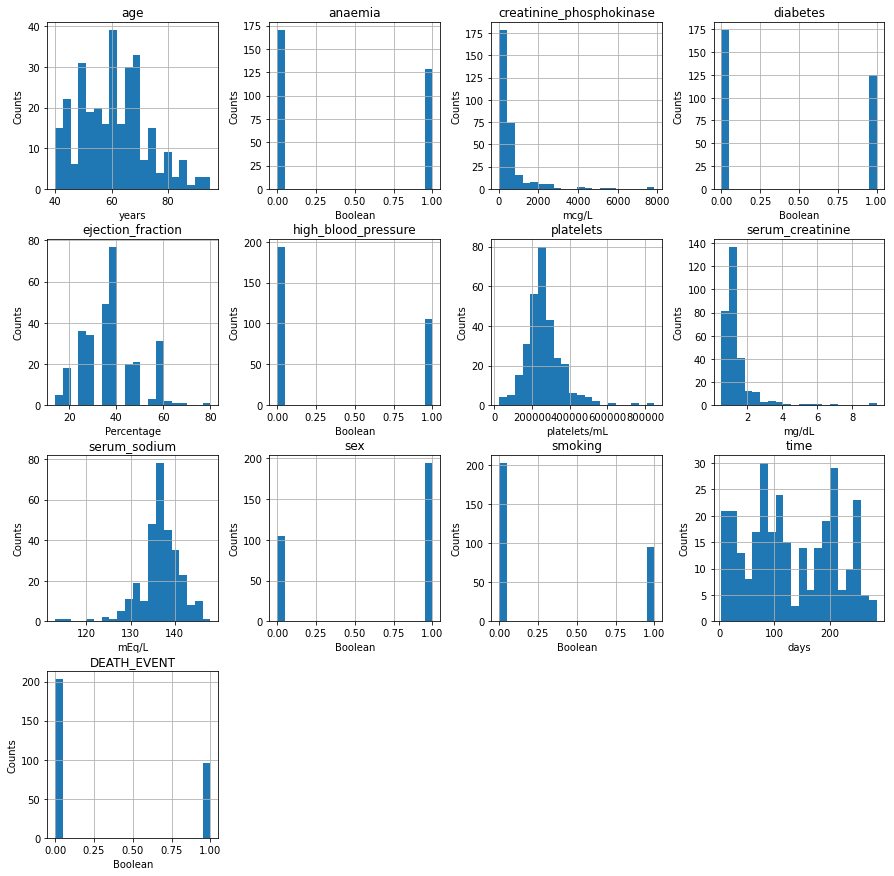

In [5]:
ax=dataset.hist(bins=20,figsize=(15, 15))
                                                                                
x_units = ['years','Boolean','mcg/L','Boolean','Percentage','Boolean', 'platelets/mL','mg/dL','mEq/L','Boolean',
           'Boolean','days','Boolean']
count = 0

for i in range(ax.shape[0]):
    for j in range(ax.shape[1]):
        ax[i][j].set_ylabel('Counts')
        try:
             ax[i][j].set_xlabel(f'{x_units[count]}')
        except:
            pass
        count += 1                                                                      
plt.show()

## summary statistics of variables

In [6]:
dataset.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


##### As shown in the histograms and the description above there is no Exceptional values in the data 

# Q2-test-train split

In [7]:
feature_list = ['age','anaemia','creatinine_phosphokinase','diabetes','ejection_fraction','high_blood_pressure','platelets','serum_creatinine','serum_sodium','sex','smoking','time']
continous_features = ['age', 'creatinine_phosphokinase','ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium','time']
benary_features=['anaemia','diabetes','high_blood_pressure','sex','smoking']
X = dataset[feature_list]
death = dataset['DEATH_EVENT']

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, np.ravel(death), test_size=0.2, random_state=3, stratify=np.ravel(death))

# Q3- exploration of the data

## a-Analysis of the features after test-train split

To show that the binari features are similar in the test and train

In [9]:
distribution_feat = X_train.drop(columns=['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time']).keys()
distribution_train = X_train.drop(columns=['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time']).mean()*100
distribution_test = X_test.drop(columns=['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time']).mean()*100
distribution = {'Feature':distribution_feat, 'Train %':distribution_train, 'Test %':distribution_test, 'Delta %':distribution_train-distribution_test}
distribution_table = pd.DataFrame(distribution)
display(distribution_table.style.hide_index())


Feature,Train %,Test %,Delta %
anaemia,44.769874,36.666667,8.103208
diabetes,40.167364,48.333333,-8.165969
high_blood_pressure,35.983264,31.666667,4.316597
sex,65.690377,61.666667,4.023710
smoking,31.380753,35.000000,-3.619247


##### distribution of the features after test-train split

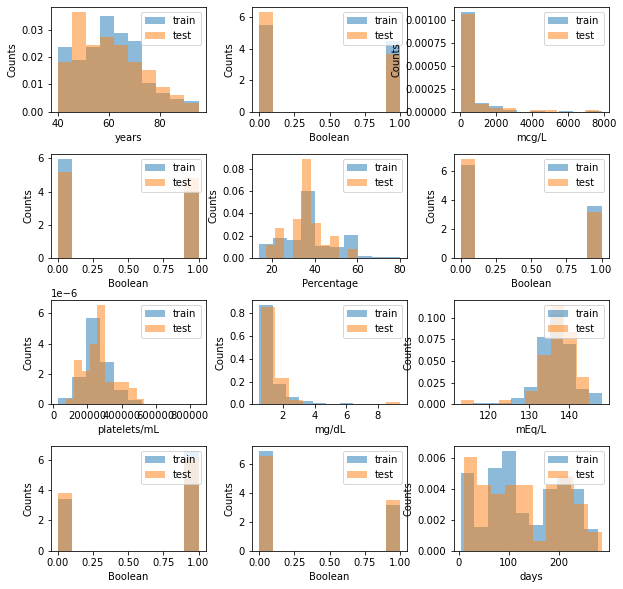

In [10]:
fig, axs = plt.subplots(4, 3, figsize=(10,10))
ax = axs.ravel()
for idx in range(len(ax)):
    ax[idx].hist(X_train.iloc[:, idx], density=True, alpha=0.5, label='train')
    ax[idx].hist(X_test.iloc[:, idx], density=True, alpha=0.5, label='test')
    ax[idx].legend(loc='upper right')
    plt.subplots_adjust(hspace = 0.4, wspace = 0.3)
    
x_units = ['years','Boolean','mcg/L','Boolean','Percentage','Boolean', 'platelets/mL','mg/dL','mEq/L','Boolean',
           'Boolean','days','Boolean']
count = 0
for i in range(axs.shape[0]):
    for j in range(axs.shape[1]):
        axs[i][j].set_ylabel('Counts')
        try:
             axs[i][j].set_xlabel(f'{x_units[count]}')
        except:
            pass
        count += 1
plt.show()

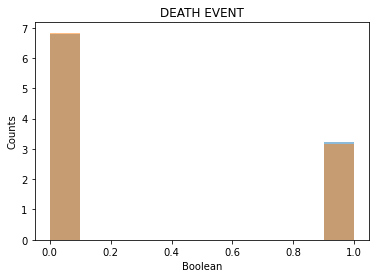

In [11]:
plt.hist(Y_train, density=True, alpha=0.5, label='train')
plt.hist(Y_test, density=True, alpha=0.5, label='test')
plt.ylabel('Counts')
plt.xlabel('Boolean')
plt.title('DEATH EVENT')
plt.show() 

### I: What issues could an imbalance of features between train and  test cause?
Imbalance of features between train and test sets could cause poor generalization, regular splitting the data to train and test can lead to imbalance of features between train and test.

### II: How could you solve the issue?
This issue could be solved by stratification, which splits the groups preserving the general distribution of the features for both groups (test and train).

## b-The relationship between feature and label.

plots show the distribution of feature vs label:

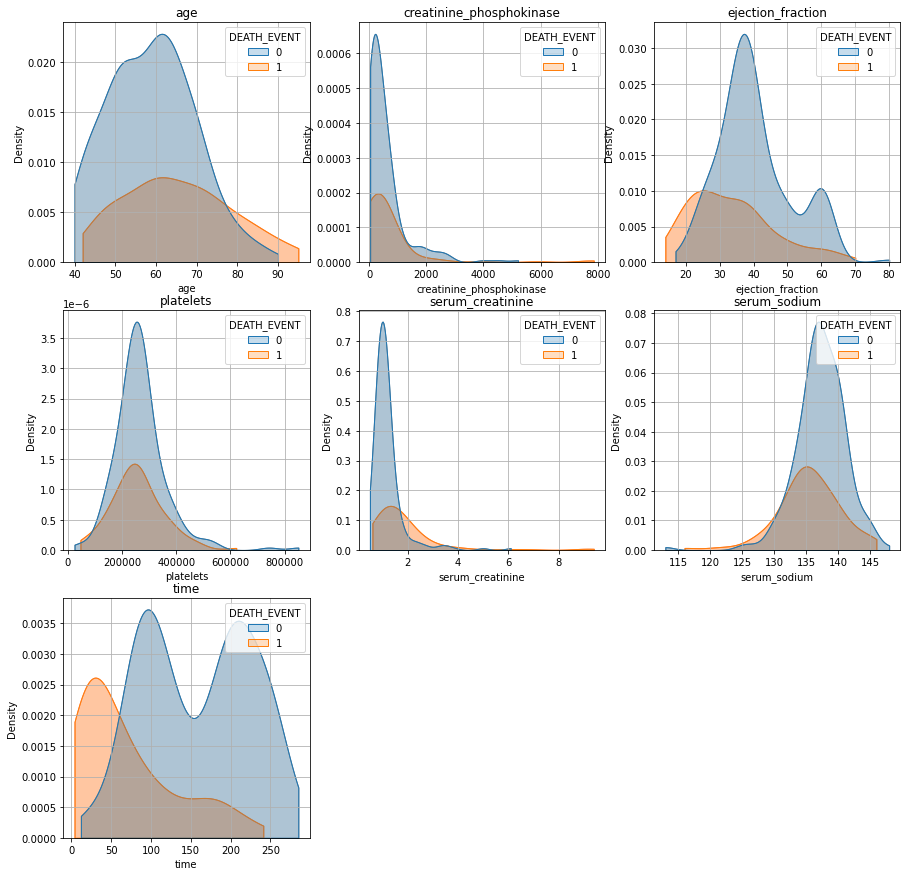

In [12]:
plt.figure(figsize=(15, 15))
for i, col in enumerate(continous_features):
    plt.subplot(3, 3, i+1)
    plt.grid(True)
    plt.title(col)
    sns.kdeplot(data= dataset, x = col, hue='DEATH_EVENT', palette = ['gray', "coral"], shade=True,cut=0)
    sns.kdeplot(data= dataset, x = col, hue='DEATH_EVENT', shade=True,cut=0)

plots show the relationship between feature and label of the binary features:

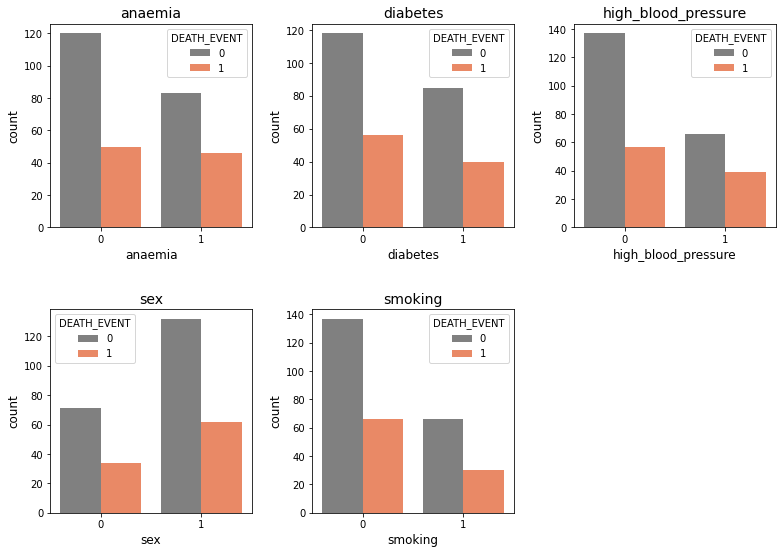

In [13]:
plt.figure(figsize=(13, 9))

for i, var in enumerate(benary_features):
    plt.subplot(2, 3, i+1)
    plt.title(var, fontsize=14)
    plt.xlabel(var, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.subplots_adjust(hspace = 0.4, wspace = 0.3)
    sns.countplot(data= dataset, x = var, hue='DEATH_EVENT', palette = ['gray', "coral"])
    

## c-Additional plots that make sense given the mostly binary nature of this dataset.


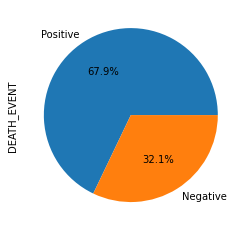

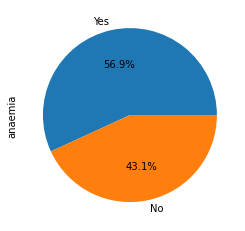

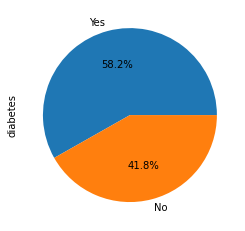

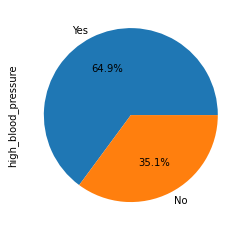

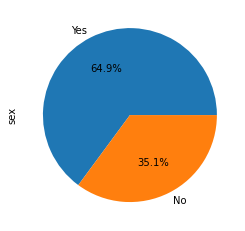

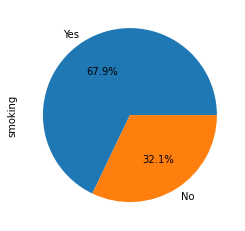

In [14]:
death.value_counts().plot(kind="pie", labels=['Positive','Negative'], autopct='%1.1f%%') 
plt.show()

for feature in ['anaemia','diabetes','high_blood_pressure','sex','smoking']:
    X[feature].value_counts().plot(kind="pie", labels=['Yes','No'], autopct='%1.1f%%') 
    plt.show()


## d- State of insights 

## I: Was there anything unexpected?
Looking at the graphs, we can see that most of the patients who did not die during the follow-up period had an extended period, but we expect that patients who have heart failure for a longer time will have a higher probability of dying during the follow-up period

## II:Are there any features that you feel will be particularly important to your model? Explain why.
By looking at the graphs, we can see that the features of age, serum creatinine, ejection fraction have differences in the diagnosis according to the feature. We think these features will have the highest importance among all the features in the prediction of the model.

# Q4 - Encode all your categorical data as one hot vector

In [15]:
X_h = dataset[feature_list]
Y_h = dataset['DEATH_EVENT']
X_train_new, X_test_new, Y_train_new, Y_test_new= train_test_split(X_h, Y_h, test_size=0.2, random_state=10, stratify=Y_h)

X_train_h = X_train_new.values
X_test_h = X_test_new.values
Y_train_h = Y_train_new.values
Y_test_h = Y_test_new.values

X_train_new_bin = X_train_new.drop(['age', 'creatinine_phosphokinase','ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium','time'],axis=1)
X_test_new_bin = X_test_new.drop(['age', 'creatinine_phosphokinase','ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium','time'],axis=1)
Y_train_new_bin = Y_train_new
Y_test_new_bin = Y_test_new

X_train_new_bin = X_train_new_bin.values
X_test_new_bin = X_test_new_bin.values
Y_train_new_bin = Y_train_new_bin.values
Y_test_new_bin = Y_test_new_bin.values

# Q5 - Choose, build and optimize Machine Learning Models

### a.Use 5k cross fold validation and tune the models to achieve the highest test AUC

### b. Report the appropriate evaluation metrics of the train and test sets (AUC, F1, LOSS, ACC). 

In the first step we define the calc function in order to display the results of Machine Learning Models

In [16]:
def calc (x_test, y_test, y_pred_test, y_pred_proba_test):
    calc_TN = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[0, 0]
    calc_FP = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[0, 1]
    calc_FN = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[1, 0]
    calc_TP = lambda y_true, y_pred: confusion_matrix(y_true, y_pred)[1, 1]
    TN = calc_TN(y_test,y_pred_test)
    FP = calc_FP(y_test,y_pred_test)
    FN = calc_FN(y_test,y_pred_test)
    TP = calc_TP(y_test,y_pred_test)
    Se = TP/(TP+FN)
    Sp = TN/(TN+FP)
    PPV = TP/(TP+FP)
    NPV = TN/(TN+FN)
    Acc = (TP+TN)/(TP+TN+FP+FN)
    F1 = (2*Se*PPV)/(Se+PPV)
    loss= log_loss(y_test,y_pred_proba_test)

    print('Sensitivity is {:.4f}. \nSpecificity is {:.4f}. \nPPV is {:.4f}. \nNPV is {:.4f}. \nAccuracy is {:.4f}. \nF1 is {:.4f}. '.format(Se,Sp,PPV,NPV,Acc,F1))
    print('AUROC is {:.2f}'.format(roc_auc_score(y_test, y_pred_proba_test[:,1])))
    print('loss is {:.2f}'.format(loss))

### I- Train one or more linear models on your training set

#### 1) Logistic regression

In [17]:
n_splits=5
pen = ['l1','l2']
random_state=10
skf = StratifiedKFold(n_splits=n_splits,random_state=random_state ,shuffle=True)
lmbda = np.array([0.001, 0.01, 1, 10, 100, 1000])

solver = 'liblinear'
log_reg = LogisticRegression(penalty=pen, C = 1/lmbda, solver=solver)
pipe = Pipeline(steps=[('scale', MinMaxScaler()), ('logistic', log_reg)])
LogReg = GridSearchCV(estimator=pipe, param_grid={'logistic__C': 1/lmbda, 'logistic__penalty': pen},
                   scoring=['accuracy','f1','roc_auc'], cv=skf,
                   refit='roc_auc', verbose=3, return_train_score=True)

LogReg.fit(X_train_h, Y_train_h)
chosen_LogReg = LogReg.best_estimator_

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END logistic__C=1000.0, logistic__penalty=l1; accuracy: (train=0.843, test=0.812) f1: (train=0.741, test=0.690) roc_auc: (train=0.896, test=0.883) total time=   0.0s
[CV 2/5] END logistic__C=1000.0, logistic__penalty=l1; accuracy: (train=0.838, test=0.729) f1: (train=0.739, test=0.552) roc_auc: (train=0.897, test=0.834) total time=   0.0s
[CV 3/5] END logistic__C=1000.0, logistic__penalty=l1; accuracy: (train=0.832, test=0.896) f1: (train=0.719, test=0.800) roc_auc: (train=0.886, test=0.949) total time=   0.0s
[CV 4/5] END logistic__C=1000.0, logistic__penalty=l1; accuracy: (train=0.864, test=0.812) f1: (train=0.787, test=0.667) roc_auc: (train=0.918, test=0.790) total time=   0.0s
[CV 5/5] END logistic__C=1000.0, logistic__penalty=l1; accuracy: (train=0.865, test=0.723) f1: (train=0.772, test=0.606) roc_auc: (train=0.913, test=0.823) total time=   0.0s
[CV 1/5] END logistic__C=1000.0, logistic__penalty=l2; accuracy:

In [18]:
y_pred_test = chosen_LogReg.predict(X_test_h) 
y_pred_proba_test = chosen_LogReg.predict_proba(X_test_h)
y_pred_train = chosen_LogReg.predict(X_train_h) 
y_pred_proba_train = chosen_LogReg.predict_proba(X_train_h)
print(LogReg.best_params_)

print('Test set:')
calc (X_test_h, Y_test_h, y_pred_test, y_pred_proba_test)

print('\nTrain set:')
calc (X_train_h, Y_train_h, y_pred_train, y_pred_proba_train)

{'logistic__C': 1.0, 'logistic__penalty': 'l1'}
Test set:
Sensitivity is 0.6842. 
Specificity is 0.8780. 
PPV is 0.7222. 
NPV is 0.8571. 
Accuracy is 0.8167. 
F1 is 0.7027. 
AUROC is 0.86
loss is 0.42

Train set:
Sensitivity is 0.6753. 
Specificity is 0.9383. 
PPV is 0.8387. 
NPV is 0.8588. 
Accuracy is 0.8536. 
F1 is 0.7482. 
AUROC is 0.89
loss is 0.39


Test set:


C:\Users\Fadi\miniconda3\envs\bm-336546\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


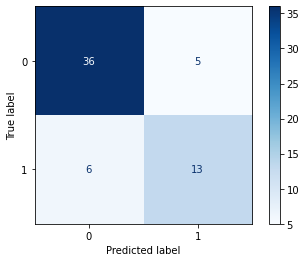


Train set:


C:\Users\Fadi\miniconda3\envs\bm-336546\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


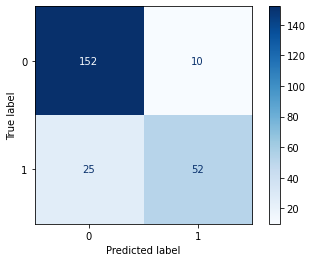

In [19]:
print('Test set:')
plot_confusion_matrix(chosen_LogReg,X_test_h,Y_test_h, cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

print('\nTrain set:')
plot_confusion_matrix(chosen_LogReg,X_train_h,Y_train_h, cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

#### 2) Linear SVM 

In [20]:
C = np.array([0.001, 0.01, 1, 10, 100, 1000])

skf = StratifiedKFold(n_splits=n_splits, random_state=random_state, shuffle=True)
svc = SVC(probability=True)
pipe = Pipeline(steps=[('scale', StandardScaler()), ('svm', svc)])
svm_lin = GridSearchCV(estimator=pipe,
             param_grid={'svm__kernel':['linear'], 'svm__C':C}, 
             scoring=['accuracy','f1','roc_auc'], 
             cv=skf, refit='roc_auc', verbose=3, return_train_score=True)

svm_lin.fit(X_train_h,Y_train_h)
chosen_svm_lin = svm_lin.best_estimator_

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END svm__C=0.001, svm__kernel=linear; accuracy: (train=0.681, test=0.667) f1: (train=0.000, test=0.000) roc_auc: (train=0.885, test=0.908) total time=   0.0s
[CV 2/5] END svm__C=0.001, svm__kernel=linear; accuracy: (train=0.681, test=0.667) f1: (train=0.000, test=0.000) roc_auc: (train=0.895, test=0.889) total time=   0.0s
[CV 3/5] END svm__C=0.001, svm__kernel=linear; accuracy: (train=0.675, test=0.688) f1: (train=0.000, test=0.000) roc_auc: (train=0.882, test=0.958) total time=   0.0s
[CV 4/5] END svm__C=0.001, svm__kernel=linear; accuracy: (train=0.675, test=0.688) f1: (train=0.000, test=0.000) roc_auc: (train=0.912, test=0.780) total time=   0.0s
[CV 5/5] END svm__C=0.001, svm__kernel=linear; accuracy: (train=0.677, test=0.681) f1: (train=0.000, test=0.000) roc_auc: (train=0.909, test=0.779) total time=   0.0s
[CV 1/5] END svm__C=0.01, svm__kernel=linear; accuracy: (train=0.733, test=0.750) f1: (train=0.354, test=

In [21]:
y_pred_test = chosen_svm_lin.predict(X_test_h) 
y_pred_proba_test = chosen_svm_lin.predict_proba(X_test_h)
y_pred_train = chosen_svm_lin.predict(X_train_h) 
y_pred_proba_train = chosen_svm_lin.predict_proba(X_train_h)
print(svm_lin.best_params_)
print('Test set:')
calc (X_test_h, Y_test_h, y_pred_test, y_pred_proba_test)
print('\nTrain set:')
calc (X_train_h, Y_train_h, y_pred_train, y_pred_proba_train)

{'svm__C': 1.0, 'svm__kernel': 'linear'}
Test set:
Sensitivity is 0.7368. 
Specificity is 0.8780. 
PPV is 0.7368. 
NPV is 0.8780. 
Accuracy is 0.8333. 
F1 is 0.7368. 
AUROC is 0.88
loss is 0.40

Train set:
Sensitivity is 0.6883. 
Specificity is 0.9383. 
PPV is 0.8413. 
NPV is 0.8636. 
Accuracy is 0.8577. 
F1 is 0.7571. 
AUROC is 0.89
loss is 0.38


Test set:


C:\Users\Fadi\miniconda3\envs\bm-336546\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


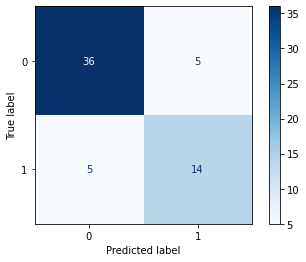


 Train set:


C:\Users\Fadi\miniconda3\envs\bm-336546\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


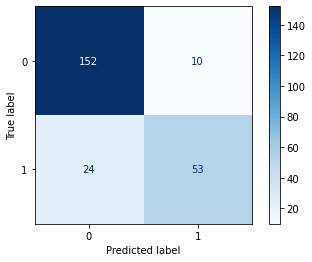

In [22]:
print('Test set:')
plot_confusion_matrix(chosen_svm_lin,X_test_h,Y_test_h, cmap=plt.cm.Blues)
plt.grid(False)
plt.show()
print('\n Train set:')
plot_confusion_matrix(chosen_svm_lin,X_train_h,Y_train_h, cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

### II- Train one or more non-linear models on your training set

####  1)SVM with kernel rbf and poly.

In [23]:
C = np.array([0.001, 0.01, 1, 10, 100,1000])

skf = StratifiedKFold(n_splits=n_splits, random_state=random_state, shuffle=True)
svc = SVC(probability=True)
pipe = Pipeline(steps=[('scale', MinMaxScaler()), ('svm', svc)])
svm_nonlin_rbf_poly = GridSearchCV(estimator=pipe,
                 param_grid={'svm__kernel':['rbf','poly'], 'svm__C':C, 'svm__degree':[3], 'svm__gamma':['auto','scale']},
                 scoring=['accuracy','f1','roc_auc'], 
                 cv=skf, refit='roc_auc', verbose=3, return_train_score=True)

svm_nonlin_rbf_poly.fit(X_train_h,Y_train_h)
chosen_svm_nonlin_rbf_poly = svm_nonlin_rbf_poly.best_estimator_

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END svm__C=0.001, svm__degree=3, svm__gamma=auto, svm__kernel=rbf; accuracy: (train=0.681, test=0.667) f1: (train=0.000, test=0.000) roc_auc: (train=0.870, test=0.830) total time=   0.0s
[CV 2/5] END svm__C=0.001, svm__degree=3, svm__gamma=auto, svm__kernel=rbf; accuracy: (train=0.681, test=0.667) f1: (train=0.000, test=0.000) roc_auc: (train=0.891, test=0.898) total time=   0.0s
[CV 3/5] END svm__C=0.001, svm__degree=3, svm__gamma=auto, svm__kernel=rbf; accuracy: (train=0.675, test=0.688) f1: (train=0.000, test=0.000) roc_auc: (train=0.854, test=0.923) total time=   0.0s
[CV 4/5] END svm__C=0.001, svm__degree=3, svm__gamma=auto, svm__kernel=rbf; accuracy: (train=0.675, test=0.688) f1: (train=0.000, test=0.000) roc_auc: (train=0.892, test=0.747) total time=   0.0s
[CV 5/5] END svm__C=0.001, svm__degree=3, svm__gamma=auto, svm__kernel=rbf; accuracy: (train=0.677, test=0.681) f1: (train=0.000, test=0.000) roc_auc: (tr

In [24]:
y_pred_test = chosen_svm_nonlin_rbf_poly.predict(X_test_h) 
y_pred_proba_test = chosen_svm_nonlin_rbf_poly.predict_proba(X_test_h)
y_pred_train = chosen_svm_nonlin_rbf_poly.predict(X_train_h) 
y_pred_proba_train = chosen_svm_nonlin_rbf_poly.predict_proba(X_train_h)
print(svm_nonlin_rbf_poly.best_params_)
print('Test set:')
calc (X_test_h, Y_test_h, y_pred_test, y_pred_proba_test)
print('\nTrain set:')
calc (X_train_h, Y_train_h, y_pred_train, y_pred_proba_train)

{'svm__C': 10.0, 'svm__degree': 3, 'svm__gamma': 'auto', 'svm__kernel': 'rbf'}
Test set:
Sensitivity is 0.7368. 
Specificity is 0.8780. 
PPV is 0.7368. 
NPV is 0.8780. 
Accuracy is 0.8333. 
F1 is 0.7368. 
AUROC is 0.84
loss is 0.43

Train set:
Sensitivity is 0.6623. 
Specificity is 0.9383. 
PPV is 0.8361. 
NPV is 0.8539. 
Accuracy is 0.8494. 
F1 is 0.7391. 
AUROC is 0.91
loss is 0.35


Test set:


C:\Users\Fadi\miniconda3\envs\bm-336546\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


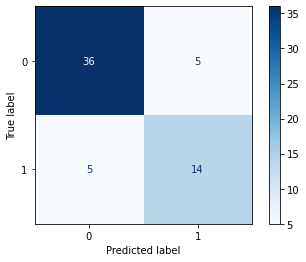


 Train set:


C:\Users\Fadi\miniconda3\envs\bm-336546\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


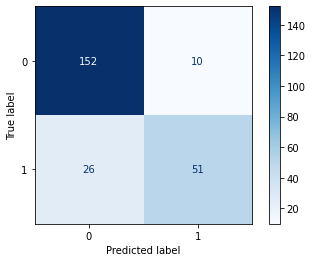

In [25]:
print('Test set:')
plot_confusion_matrix(chosen_svm_nonlin_rbf_poly,X_test_h,Y_test_h, cmap=plt.cm.Blues)
plt.grid(False)
plt.show()
print('\n Train set:')
plot_confusion_matrix(chosen_svm_nonlin_rbf_poly,X_train_h,Y_train_h, cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

### C- What performs best on this dataset? Linear or non-linear models?
According to the Accuracy, F1, and AUROC values, the non-linear SVM models perform best on this dataset


## Question 6 - Feature Selection


#### Training a Random Forest on our data 

In [26]:
rfc = RandomForestClassifier(n_estimators=100)

rfc.fit(X_train_h, Y_train_h)

y_pred_test = rfc.predict(X_test_h) 
y_pred_proba_test = rfc.predict_proba(X_test_h)
y_pred_train = rfc.predict(X_train_h) 
y_pred_proba_train = rfc.predict_proba(X_train_h)
                                       

print('Test set:')
calc (X_test_h, Y_test_h, y_pred_test, y_pred_proba_test)
print('\nTrain set:')
calc (X_train_h, Y_train_h, y_pred_train, y_pred_proba_train)

Test set:
Sensitivity is 0.7368. 
Specificity is 0.8780. 
PPV is 0.7368. 
NPV is 0.8780. 
Accuracy is 0.8333. 
F1 is 0.7368. 
AUROC is 0.92
loss is 0.34

Train set:
Sensitivity is 1.0000. 
Specificity is 1.0000. 
PPV is 1.0000. 
NPV is 1.0000. 
Accuracy is 1.0000. 
F1 is 1.0000. 
AUROC is 1.00
loss is 0.10


Test set:


C:\Users\Fadi\miniconda3\envs\bm-336546\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


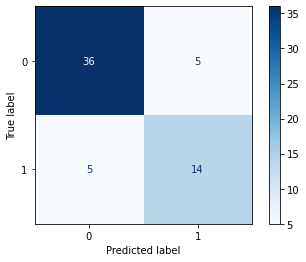


 Train set:


C:\Users\Fadi\miniconda3\envs\bm-336546\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


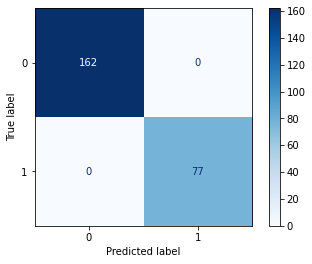

In [27]:
print('Test set:')
plot_confusion_matrix(rfc,X_test_h,Y_test_h, cmap=plt.cm.Blues)
plt.grid(False)
plt.show()
print('\n Train set:')
plot_confusion_matrix(rfc,X_train_h,Y_train_h, cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

calculating the importance of the features according to the random forest.

In [28]:
feature_imp = pd.Series(rfc.feature_importances_, index = X_train.columns).sort_values(ascending=False)
feature_imp

time                        0.343415
serum_creatinine            0.151988
ejection_fraction           0.108341
age                         0.087729
serum_sodium                0.083448
platelets                   0.081611
creatinine_phosphokinase    0.076360
diabetes                    0.014532
sex                         0.014015
anaemia                     0.013303
smoking                     0.013141
high_blood_pressure         0.012117
dtype: float64

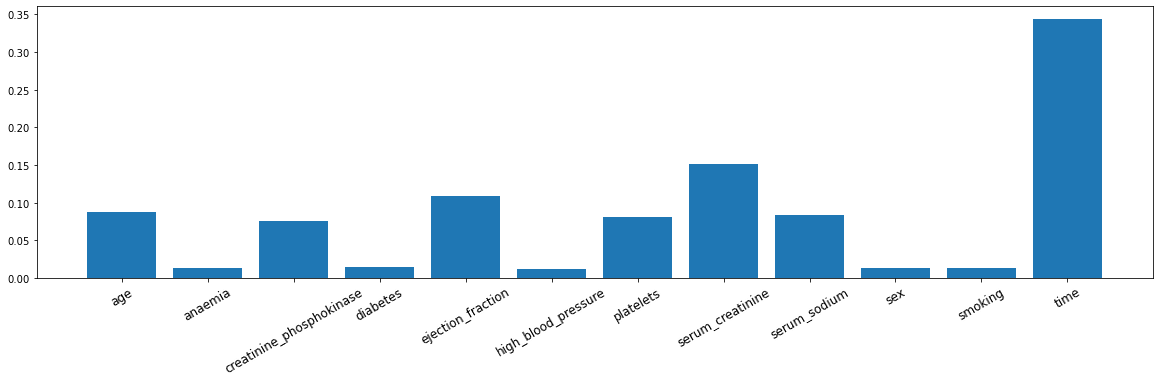

In [29]:
feature_importances = rfc.feature_importances_
plt.figure(figsize=(20,5))
plt.bar(feature_list, feature_importances)
plt.xticks(rotation=30, size=12)
plt.show()

## I: What are the 2 most important features according to the random forest. 

As we can see from the table, the 2 most important features according to the random forest are "time" and "serum_creatinine "

## II: Does this match up exactly with the feature exploration you did? 
Based on our feature exploration, the most important features are age, serum creatinine, and ejection fraction, however, if we look at the table above, we will notice that time is the most important feature, followed by serum creatinine. 


## Question 7 - Data Separability Visualization


## a-dimensionality reduction

In [30]:
scaler = StandardScaler()
X_train_scaled = X_train_new.copy()
X_test_scaled = X_test_new.copy()

X_train_scaled['age'] = scaler.fit_transform(X_train_new['age'].values.reshape(-1, 1))
X_test_scaled['age'] = scaler.transform(X_test_new['age'].values.reshape(-1, 1))


X_train_scaled['creatinine_phosphokinase'] = scaler.fit_transform(X_train_new['creatinine_phosphokinase'].values.reshape(-1, 1))
X_test_scaled['creatinine_phosphokinase'] = scaler.transform(X_test_new['creatinine_phosphokinase'].values.reshape(-1, 1))

X_train_scaled['ejection_fraction'] = scaler.fit_transform(X_train_new['ejection_fraction'].values.reshape(-1, 1))
X_test_scaled['ejection_fraction'] = scaler.transform(X_test_new['ejection_fraction'].values.reshape(-1, 1))

X_train_scaled['platelets'] = scaler.fit_transform(X_train_new['platelets'].values.reshape(-1, 1))
X_test_scaled['platelets'] = scaler.transform(X_test_new['platelets'].values.reshape(-1, 1))

X_train_scaled['serum_creatinine'] = scaler.fit_transform(X_train_new['serum_creatinine'].values.reshape(-1, 1))
X_test_scaled['serum_creatinine'] = scaler.transform(X_test_new['serum_creatinine'].values.reshape(-1, 1))

X_train_scaled['serum_sodium'] = scaler.fit_transform(X_train_new['serum_sodium'].values.reshape(-1, 1))
X_test_scaled['serum_sodium'] = scaler.transform(X_test_new['serum_sodium'].values.reshape(-1, 1))

X_train_scaled['time'] = scaler.fit_transform(X_train_new['time'].values.reshape(-1, 1))
X_test_scaled['time'] = scaler.transform(X_test_new['time'].values.reshape(-1, 1))


In [31]:
def plt_2d_pca(X_pca,y):
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, aspect='equal')
    ax.scatter(X_pca[y==0, 0], X_pca[y==0, 1], color='b')
    ax.scatter(X_pca[y==1, 0], X_pca[y==1, 1], color='r')
    ax.legend(('DEATH_EVENT','NOT DEATH_EVENT'))
    ax.plot([0], [0], "ko")
    ax.arrow(0, 0, 0, 1, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
    ax.arrow(0, 0, 1, 0, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
    ax.set_xlabel('$U_1$')
    ax.set_ylabel('$U_2$')
    ax.set_title('2D PCA')

#### plot your data in a 2d plot


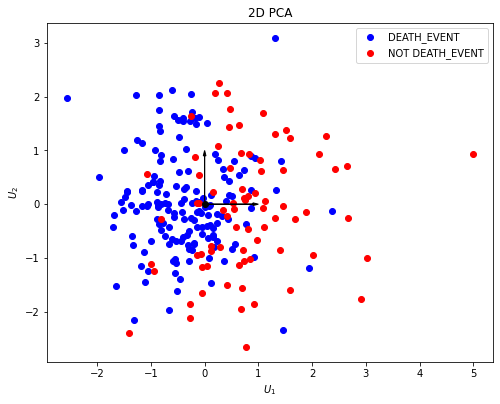

In [32]:
n_components = 2
pca = PCA(n_components=n_components,whiten=True)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
plt_2d_pca(X_train_pca,Y_train_new)
plt.show()

## b- How separable is your data when reduced to just two features
As can be seen in the plot above, when we reduce our data to just two features, the data is separable, though not perfectly separable. It is possible to find a line that separates the Death event from the no-death event. However, since data is not completely separable, and there is overlap between the two labels, it will still result in misdetections.

## c-Training the same models above on the dimensionality-reduced training set.

### 1-Logistic regression

In [33]:
n_splits=5
pen = ['l1','l2']
random_state=10
skf = StratifiedKFold(n_splits=n_splits,random_state=random_state ,shuffle=True)
lmbda = np.array([0.001, 0.01, 1, 10, 100, 1000])
solver = 'liblinear'

log_reg_2d = LogisticRegression(random_state=random_state,penalty=pen, C = 1/lmbda, solver=solver)
pipe = Pipeline(steps=[('scale', MinMaxScaler()), ('logistic', log_reg_2d)])

LogReg_2D = GridSearchCV(estimator=pipe, param_grid={'logistic__C': 1/lmbda, 'logistic__penalty': pen},
                   scoring=['accuracy','f1','roc_auc'], cv=skf,
                   refit='roc_auc', verbose=3, return_train_score=True)

LogReg_2D.fit(X_train_pca, Y_train_h)
chosen_LogReg_2D = LogReg_2D.best_estimator_

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END logistic__C=1000.0, logistic__penalty=l1; accuracy: (train=0.791, test=0.812) f1: (train=0.623, test=0.690) roc_auc: (train=0.826, test=0.914) total time=   0.0s
[CV 2/5] END logistic__C=1000.0, logistic__penalty=l1; accuracy: (train=0.806, test=0.771) f1: (train=0.654, test=0.621) roc_auc: (train=0.853, test=0.791) total time=   0.0s
[CV 3/5] END logistic__C=1000.0, logistic__penalty=l1; accuracy: (train=0.785, test=0.812) f1: (train=0.617, test=0.609) roc_auc: (train=0.822, test=0.929) total time=   0.0s
[CV 4/5] END logistic__C=1000.0, logistic__penalty=l1; accuracy: (train=0.806, test=0.792) f1: (train=0.667, test=0.643) roc_auc: (train=0.859, test=0.772) total time=   0.0s
[CV 5/5] END logistic__C=1000.0, logistic__penalty=l1; accuracy: (train=0.797, test=0.766) f1: (train=0.649, test=0.560) roc_auc: (train=0.858, test=0.792) total time=   0.0s
[CV 1/5] END logistic__C=1000.0, logistic__penalty=l2; accuracy:

In [34]:
y_pred_test_2d = chosen_LogReg_2D.predict(X_test_pca) 
y_pred_proba_test_2d = chosen_LogReg_2D.predict_proba(X_test_pca)

y_pred_train_2d = chosen_LogReg_2D.predict(X_train_pca) 
y_pred_proba_train_2d = chosen_LogReg_2D.predict_proba(X_train_pca)

print('Test set:')
calc (X_test_pca, Y_test_h, y_pred_test_2d, y_pred_proba_test_2d)
print('\nTrain set:')
calc (X_train_pca, Y_train_h, y_pred_train_2d, y_pred_proba_train_2d)

Test set:
Sensitivity is 0.5789. 
Specificity is 0.9024. 
PPV is 0.7333. 
NPV is 0.8222. 
Accuracy is 0.8000. 
F1 is 0.6471. 
AUROC is 0.84
loss is 0.44

Train set:
Sensitivity is 0.5584. 
Specificity is 0.9074. 
PPV is 0.7414. 
NPV is 0.8122. 
Accuracy is 0.7950. 
F1 is 0.6370. 
AUROC is 0.84
loss is 0.46


Test set:


C:\Users\Fadi\miniconda3\envs\bm-336546\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


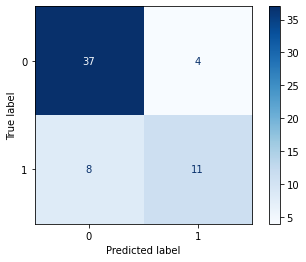


Train set:


C:\Users\Fadi\miniconda3\envs\bm-336546\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


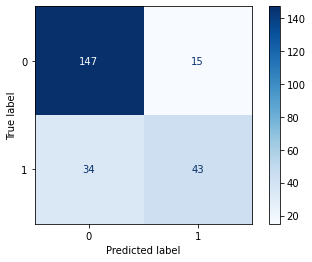

In [35]:
print('Test set:')
plot_confusion_matrix(chosen_LogReg_2D,X_test_pca,Y_test_h, cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

print('\nTrain set:')
plot_confusion_matrix(chosen_LogReg_2D,X_train_pca,Y_train_h, cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

#### 2) Linear SVM 

In [36]:
C = np.array([0.001, 0.01, 1, 10, 100, 1000])

skf = StratifiedKFold(n_splits=n_splits, random_state=random_state, shuffle=True)
svc = SVC(probability=True)
pipe = Pipeline(steps=[('scale', MinMaxScaler()), ('svm', svc)])
svm_lin_2d = GridSearchCV(estimator=pipe,
             param_grid={'svm__kernel':['linear'], 'svm__C':C}, 
             scoring=['accuracy','f1','roc_auc'], 
             cv=skf, refit='roc_auc', verbose=3, return_train_score=True)

svm_lin_2d.fit(X_train_pca,Y_train_h)
chosen_svm_lin_2d = svm_lin_2d.best_estimator_

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END svm__C=0.001, svm__kernel=linear; accuracy: (train=0.681, test=0.667) f1: (train=0.000, test=0.000) roc_auc: (train=0.826, test=0.914) total time=   0.0s
[CV 2/5] END svm__C=0.001, svm__kernel=linear; accuracy: (train=0.681, test=0.667) f1: (train=0.000, test=0.000) roc_auc: (train=0.854, test=0.795) total time=   0.0s
[CV 3/5] END svm__C=0.001, svm__kernel=linear; accuracy: (train=0.675, test=0.688) f1: (train=0.000, test=0.000) roc_auc: (train=0.813, test=0.935) total time=   0.0s
[CV 4/5] END svm__C=0.001, svm__kernel=linear; accuracy: (train=0.675, test=0.688) f1: (train=0.000, test=0.000) roc_auc: (train=0.850, test=0.737) total time=   0.0s
[CV 5/5] END svm__C=0.001, svm__kernel=linear; accuracy: (train=0.677, test=0.681) f1: (train=0.000, test=0.000) roc_auc: (train=0.855, test=0.785) total time=   0.0s
[CV 1/5] END svm__C=0.01, svm__kernel=linear; accuracy: (train=0.681, test=0.667) f1: (train=0.000, test=

In [37]:
y_pred_test_2d = chosen_svm_lin_2d.predict(X_test_pca) 
y_pred_proba_test_2d = chosen_svm_lin_2d.predict_proba(X_test_pca)
y_pred_train_2d = chosen_svm_lin_2d.predict(X_train_pca) 
y_pred_proba_train_2d = chosen_svm_lin_2d.predict_proba(X_train_pca)
print(svm_lin_2d.best_params_)
print('Test set:')
calc (X_test_pca, Y_test_h, y_pred_test_2d, y_pred_proba_test_2d)
print('\nTrain set:')
calc (X_train_pca, Y_train_h, y_pred_train_2d, y_pred_proba_train_2d)

{'svm__C': 1.0, 'svm__kernel': 'linear'}
Test set:
Sensitivity is 0.3158. 
Specificity is 1.0000. 
PPV is 1.0000. 
NPV is 0.7593. 
Accuracy is 0.7833. 
F1 is 0.4800. 
AUROC is 0.83
loss is 0.45

Train set:
Sensitivity is 0.2208. 
Specificity is 0.9753. 
PPV is 0.8095. 
NPV is 0.7248. 
Accuracy is 0.7322. 
F1 is 0.3469. 
AUROC is 0.84
loss is 0.46


Test set:


C:\Users\Fadi\miniconda3\envs\bm-336546\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


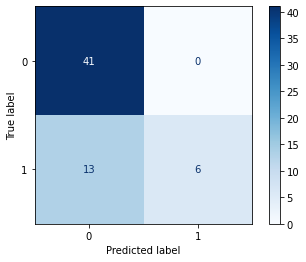


 Train set:


C:\Users\Fadi\miniconda3\envs\bm-336546\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


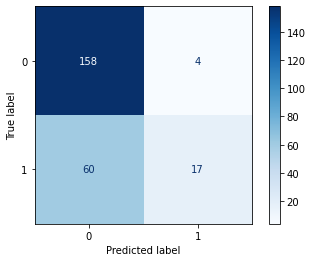

In [38]:
print('Test set:')
plot_confusion_matrix(chosen_svm_lin_2d,X_test_pca,Y_test_h, cmap=plt.cm.Blues)
plt.grid(False)
plt.show()
print('\n Train set:')
plot_confusion_matrix(chosen_svm_lin_2d,X_train_pca,Y_train_h, cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

### 3) SVM with kernel rbf and poly.

In [39]:
C = np.array([0.001, 0.01, 1, 10, 100, 1000])

skf = StratifiedKFold(n_splits=n_splits, random_state=random_state, shuffle=True)
svc = SVC(probability=True)
pipe = Pipeline(steps=[('scale', MinMaxScaler()), ('svm', svc)])
                                                   
svm_nonlin_rbf_2d = GridSearchCV(estimator=pipe,
                 param_grid={'svm__kernel':['rbf','poly'], 'svm__C':C, 'svm__degree':[3], 'svm__gamma':['auto','scale']},
                 scoring=['accuracy','f1','roc_auc'], 
                 cv=skf, refit='f1', verbose=3, return_train_score=True)
svm_nonlin_rbf_2d.fit(X_train_pca,Y_train_h)
chosen_svm_nonlin_rbf_2d= svm_nonlin_rbf_2d.best_estimator_

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END svm__C=0.001, svm__degree=3, svm__gamma=auto, svm__kernel=rbf; accuracy: (train=0.681, test=0.667) f1: (train=0.000, test=0.000) roc_auc: (train=0.833, test=0.912) total time=   0.0s
[CV 2/5] END svm__C=0.001, svm__degree=3, svm__gamma=auto, svm__kernel=rbf; accuracy: (train=0.681, test=0.667) f1: (train=0.000, test=0.000) roc_auc: (train=0.866, test=0.793) total time=   0.0s
[CV 3/5] END svm__C=0.001, svm__degree=3, svm__gamma=auto, svm__kernel=rbf; accuracy: (train=0.675, test=0.688) f1: (train=0.000, test=0.000) roc_auc: (train=0.826, test=0.954) total time=   0.0s
[CV 4/5] END svm__C=0.001, svm__degree=3, svm__gamma=auto, svm__kernel=rbf; accuracy: (train=0.675, test=0.688) f1: (train=0.000, test=0.000) roc_auc: (train=0.858, test=0.752) total time=   0.0s
[CV 5/5] END svm__C=0.001, svm__degree=3, svm__gamma=auto, svm__kernel=rbf; accuracy: (train=0.677, test=0.681) f1: (train=0.000, test=0.000) roc_auc: (tr

In [40]:
y_pred_test_2d = svm_nonlin_rbf_2d.predict(X_test_pca) 
y_pred_proba_test_2d = svm_nonlin_rbf_2d.predict_proba(X_test_pca)
y_pred_train_2d = svm_nonlin_rbf_2d.predict(X_train_pca) 
y_pred_proba_train_2d = svm_nonlin_rbf_2d.predict_proba(X_train_pca)
print(svm_nonlin_rbf_2d.best_params_)
print('Test set:')
calc (X_test_pca, Y_test_h, y_pred_test_2d, y_pred_proba_test_2d)
print('\nTrain set:')
calc (X_train_pca, Y_train_h, y_pred_train_2d, y_pred_proba_train_2d)

{'svm__C': 1.0, 'svm__degree': 3, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}
Test set:
Sensitivity is 0.6316. 
Specificity is 0.8537. 
PPV is 0.6667. 
NPV is 0.8333. 
Accuracy is 0.7833. 
F1 is 0.6486. 
AUROC is 0.82
loss is 0.46

Train set:
Sensitivity is 0.6494. 
Specificity is 0.8951. 
PPV is 0.7463. 
NPV is 0.8430. 
Accuracy is 0.8159. 
F1 is 0.6944. 
AUROC is 0.87
loss is 0.42


Test set:


C:\Users\Fadi\miniconda3\envs\bm-336546\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


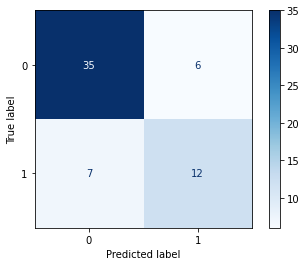


 Train set:


C:\Users\Fadi\miniconda3\envs\bm-336546\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


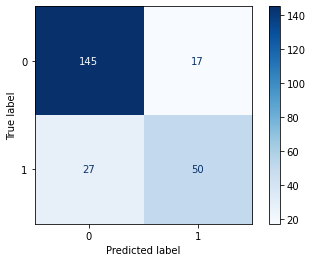

In [41]:
print('Test set:')
plot_confusion_matrix(chosen_svm_nonlin_rbf_2d,X_test_pca,Y_test_h, cmap=plt.cm.Blues)
plt.grid(False)
plt.show()
print('\n Train set:')
plot_confusion_matrix(chosen_svm_nonlin_rbf_2d,X_train_pca,Y_train_h, cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

## d-Training the same models on the best two features from section 6.

Best two features form section 6: (time,serum_creatinine)


In [42]:
X_train_2d = X_train_new[['serum_creatinine','time']]
X_test_2d = X_test_new[['serum_creatinine','time']]

### 1) Logistic regression

In [43]:

pen = ['l1', 'l2']
skf = StratifiedKFold(n_splits=n_splits,random_state=random_state ,shuffle=True)
lmbda = np.array([0.001, 0.01, 1, 10, 100, 1000])

log_reg_2d = LogisticRegression(penalty=pen, C = 1/lmbda, solver=solver)

pipe = Pipeline(steps=[('scale', StandardScaler()), ('logistic', log_reg_2d)])
LogReg2D = GridSearchCV(estimator=pipe, param_grid={'logistic__C': 1/lmbda, 'logistic__penalty': pen},
                   scoring=['accuracy','f1','roc_auc'], cv=skf,
                   refit='roc_auc', verbose=3, return_train_score=True)

LogReg2D.fit(X_train_2d,Y_train_h)
chosen_LogReg2D = LogReg2D.best_estimator_

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END logistic__C=1000.0, logistic__penalty=l1; accuracy: (train=0.843, test=0.812) f1: (train=0.727, test=0.710) roc_auc: (train=0.858, test=0.864) total time=   0.0s
[CV 2/5] END logistic__C=1000.0, logistic__penalty=l1; accuracy: (train=0.817, test=0.875) f1: (train=0.679, test=0.769) roc_auc: (train=0.832, test=0.963) total time=   0.0s
[CV 3/5] END logistic__C=1000.0, logistic__penalty=l1; accuracy: (train=0.806, test=0.896) f1: (train=0.661, test=0.800) roc_auc: (train=0.840, test=0.943) total time=   0.0s
[CV 4/5] END logistic__C=1000.0, logistic__penalty=l1; accuracy: (train=0.848, test=0.812) f1: (train=0.748, test=0.667) roc_auc: (train=0.888, test=0.758) total time=   0.0s
[CV 5/5] END logistic__C=1000.0, logistic__penalty=l1; accuracy: (train=0.859, test=0.745) f1: (train=0.761, test=0.571) roc_auc: (train=0.882, test=0.760) total time=   0.0s
[CV 1/5] END logistic__C=1000.0, logistic__penalty=l2; accuracy:

In [44]:
y_pred_test_2d = chosen_LogReg2D.predict(X_test_2d) 
y_pred_proba_test_2d = chosen_LogReg2D.predict_proba(X_test_2d)
y_pred_train_2d = chosen_LogReg2D.predict(X_train_2d) 
y_pred_proba_train_2d = chosen_LogReg2D.predict_proba(X_train_2d)

print('Test set:')
calc (X_test_2d, Y_test_h, y_pred_test_2d, y_pred_proba_test_2d)
print('\nTrain set:')
calc (X_train_2d, Y_train_h, y_pred_train_2d, y_pred_proba_train_2d)

Test set:
Sensitivity is 0.7368. 
Specificity is 0.9024. 
PPV is 0.7778. 
NPV is 0.8810. 
Accuracy is 0.8500. 
F1 is 0.7568. 
AUROC is 0.86
loss is 0.67

Train set:
Sensitivity is 0.6494. 
Specificity is 0.9259. 
PPV is 0.8065. 
NPV is 0.8475. 
Accuracy is 0.8368. 
F1 is 0.7194. 
AUROC is 0.86
loss is 0.67


Test set:


C:\Users\Fadi\miniconda3\envs\bm-336546\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


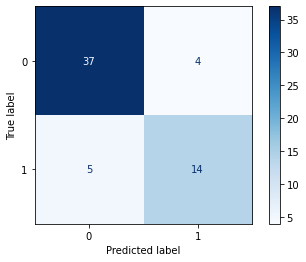


Train set:


C:\Users\Fadi\miniconda3\envs\bm-336546\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


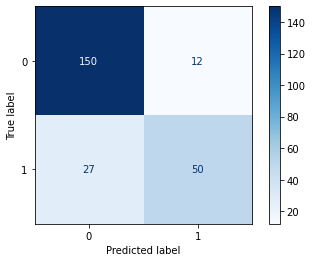

In [45]:
print('Test set:')
plot_confusion_matrix(chosen_LogReg2D,X_test_2d,Y_test_h, cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

print('\nTrain set:')
plot_confusion_matrix(chosen_LogReg2D,X_train_2d,Y_train_h, cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

### 2) Linear SVM 

In [46]:
C = np.array([0.001, 0.01, 1, 10, 100, 1000])
skf = StratifiedKFold(n_splits=n_splits, random_state=random_state, shuffle=True)

svc = SVC(probability=True, random_state=random_state)
pipe = Pipeline(steps=[('scale', MinMaxScaler()), ('svm', svc)])

svm_lin_2d = GridSearchCV(estimator=pipe,
             param_grid={'svm__kernel':['linear'], 'svm__C':C}, 
             scoring=['accuracy','f1','roc_auc'], 
             cv=skf, refit='roc_auc', verbose=3, return_train_score=True)

svm_lin_2d.fit(X_train_2d,Y_train_h)
chosen_svm_lin_2d = svm_lin_2d.best_estimator_

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END svm__C=0.001, svm__kernel=linear; accuracy: (train=0.681, test=0.667) f1: (train=0.000, test=0.000) roc_auc: (train=0.858, test=0.864) total time=   0.0s
[CV 2/5] END svm__C=0.001, svm__kernel=linear; accuracy: (train=0.681, test=0.667) f1: (train=0.000, test=0.000) roc_auc: (train=0.832, test=0.961) total time=   0.0s
[CV 3/5] END svm__C=0.001, svm__kernel=linear; accuracy: (train=0.675, test=0.688) f1: (train=0.000, test=0.000) roc_auc: (train=0.838, test=0.941) total time=   0.0s
[CV 4/5] END svm__C=0.001, svm__kernel=linear; accuracy: (train=0.675, test=0.688) f1: (train=0.000, test=0.000) roc_auc: (train=0.883, test=0.762) total time=   0.0s
[CV 5/5] END svm__C=0.001, svm__kernel=linear; accuracy: (train=0.677, test=0.681) f1: (train=0.000, test=0.000) roc_auc: (train=0.876, test=0.775) total time=   0.0s
[CV 1/5] END svm__C=0.01, svm__kernel=linear; accuracy: (train=0.681, test=0.667) f1: (train=0.000, test=

In [47]:
y_pred_test_2d = chosen_svm_lin_2d.predict(X_test_2d) 
y_pred_proba_test_2d = chosen_svm_lin_2d.predict_proba(X_test_2d)
y_pred_train_2d = chosen_svm_lin_2d.predict(X_train_2d) 
y_pred_proba_train_2d = chosen_svm_lin_2d.predict_proba(X_train_2d)

print('Test set:')
calc (X_test_2d, Y_test_h, y_pred_test_2d, y_pred_proba_test_2d)
print('\nTrain set:')
calc (X_train_2d, Y_train_h, y_pred_train_2d, y_pred_proba_train_2d)

Test set:
Sensitivity is 0.0000. 
Specificity is 1.0000. 
PPV is nan. 
NPV is 0.6833. 
Accuracy is 0.6833. 
F1 is nan. 
AUROC is 0.84
loss is 0.47

Train set:
Sensitivity is 0.0000. 
Specificity is 1.0000. 
PPV is nan. 
NPV is 0.6778. 
Accuracy is 0.6778. 
F1 is nan. 
AUROC is 0.86
loss is 0.44


C:\Users\Fadi\miniconda3\envs\bm-336546\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in longlong_scalars
  if sys.path[0] == '':
C:\Users\Fadi\miniconda3\envs\bm-336546\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in longlong_scalars
  if sys.path[0] == '':


Test set:


C:\Users\Fadi\miniconda3\envs\bm-336546\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


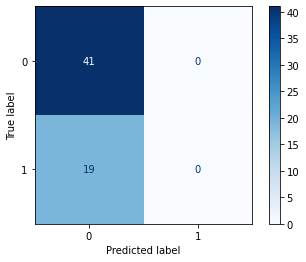

C:\Users\Fadi\miniconda3\envs\bm-336546\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)



Train set:


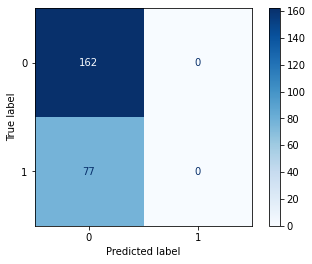

In [48]:
print('Test set:')
plot_confusion_matrix(chosen_svm_lin_2d,X_test_2d,Y_test_h, cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

print('\nTrain set:')
plot_confusion_matrix(chosen_svm_lin_2d,X_train_2d,Y_train_h, cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

### 2)  SVM with poly and rbf

In [49]:
C = np.array([0.001, 0.01, 1, 10, 100, 1000])

skf = StratifiedKFold(n_splits=5, random_state=10, shuffle=True)
svc = SVC(probability=True)
pipe = Pipeline(steps=[('scale', StandardScaler()), ('svm', svc)])
svm_nonlin_2d = GridSearchCV(estimator=pipe,
                 param_grid={'svm__kernel':['poly','rbf'], 'svm__C':C, 'svm__degree':[3], 'svm__gamma':['auto','scale']},
                 scoring=['accuracy','f1','roc_auc'], 
                 cv=skf, refit='roc_auc', verbose=3, return_train_score=True)
svm_nonlin_2d.fit(X_train_2d, np.ravel(Y_train_h))
chosen_svm_nonlin_2d = svm_nonlin_2d.best_estimator_
print(svm_nonlin_2d.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END svm__C=0.001, svm__degree=3, svm__gamma=auto, svm__kernel=poly; accuracy: (train=0.686, test=0.688) f1: (train=0.062, test=0.118) roc_auc: (train=0.858, test=0.829) total time=   0.0s
[CV 2/5] END svm__C=0.001, svm__degree=3, svm__gamma=auto, svm__kernel=poly; accuracy: (train=0.696, test=0.667) f1: (train=0.094, test=0.000) roc_auc: (train=0.819, test=0.969) total time=   0.0s
[CV 3/5] END svm__C=0.001, svm__degree=3, svm__gamma=auto, svm__kernel=poly; accuracy: (train=0.686, test=0.708) f1: (train=0.062, test=0.125) roc_auc: (train=0.830, test=0.937) total time=   0.0s
[CV 4/5] END svm__C=0.001, svm__degree=3, svm__gamma=auto, svm__kernel=poly; accuracy: (train=0.691, test=0.667) f1: (train=0.092, test=0.000) roc_auc: (train=0.880, test=0.760) total time=   0.0s
[CV 5/5] END svm__C=0.001, svm__degree=3, svm__gamma=auto, svm__kernel=poly; accuracy: (train=0.688, test=0.702) f1: (train=0.062, test=0.125) roc_auc

In [50]:
y_pred_test_2d = chosen_svm_nonlin_2d.predict(X_test_2d) 
y_pred_proba_test_2d = chosen_svm_nonlin_2d.predict_proba(X_test_2d)
y_pred_train_2d = chosen_svm_nonlin_2d.predict(X_train_2d) 
y_pred_proba_train_2d = chosen_svm_nonlin_2d.predict_proba(X_train_2d)

print('Test set:')
calc (X_test_2d, Y_test_h, y_pred_test_2d, y_pred_proba_test_2d)
print('\nTrain set:')
calc (X_train_2d, Y_train_h, y_pred_train_2d, y_pred_proba_train_2d)

Test set:
Sensitivity is 0.6316. 
Specificity is 0.9268. 
PPV is 0.8000. 
NPV is 0.8444. 
Accuracy is 0.8333. 
F1 is 0.7059. 
AUROC is 0.88
loss is 0.39

Train set:
Sensitivity is 0.6234. 
Specificity is 0.9383. 
PPV is 0.8276. 
NPV is 0.8398. 
Accuracy is 0.8368. 
F1 is 0.7111. 
AUROC is 0.87
loss is 0.40


Test set:


C:\Users\Fadi\miniconda3\envs\bm-336546\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


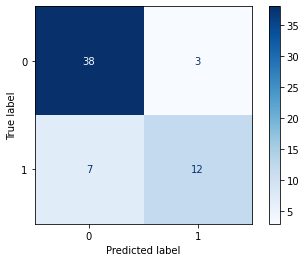


Train set:


C:\Users\Fadi\miniconda3\envs\bm-336546\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


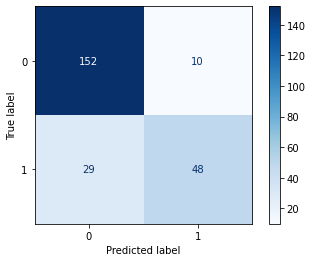

In [51]:
print('Test set:')
plot_confusion_matrix(chosen_svm_nonlin_2d,X_test_2d,Y_test_h, cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

print('\nTrain set:')
plot_confusion_matrix(chosen_svm_nonlin_2d,X_train_2d,Y_train_h, cmap=plt.cm.Blues)
plt.grid(False)
plt.show()

## e-What performs better? 2 features of the reduced dimensionality.

According to the Accuracy, F1, and AUROC values, when using Logistic regression and nonlinear SVM the 2 features perform better than the PCA. in the other hand for the linear SVM we found that the PCA performs better than the 2 features.  